In [7]:
# import data analysis libraries
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal
import math
# load data
data = pd.read_csv('Lab9_trial1.csv')
data

,Latest: Time (s),Latest: Position (m),Latest: Velocity (m/s),Latest: Acceleration (m/s²)
0,0.00,0.000,0.0,0.0
1,0.05,0.000,0.0,0.0
2,0.10,0.000,0.0,0.0
3,0.15,0.000,0.0,0.0
4,0.20,0.000,0.0,0.0
...,...,...,...,...
596,29.80,2.037,0.0,0.0
597,29.85,2.037,0.0,0.0
598,29.90,2.037,0.0,0.0
599,29.95,2.037,0.0,0.0


In [13]:
# set constants for measured quantities
CART_MASS = Decimal('.329') # kg
STARTING_HEIGHT = Decimal('.083') # meters
TRACK_LENGTH = Decimal('2.22') # meters

We must subtract 4cm from all of our position values to account for 
releasing our cart past where the block met the track.

In [3]:
data.iloc[:, 1] = data.iloc[:, 1].sub(.04)
data

,Latest: Time (s),Latest: Position (m),Latest: Velocity (m/s),Latest: Acceleration (m/s²)
0,0.00,-0.040,0.0,0.0
1,0.05,-0.040,0.0,0.0
2,0.10,-0.040,0.0,0.0
3,0.15,-0.040,0.0,0.0
4,0.20,-0.040,0.0,0.0
...,...,...,...,...
596,29.80,1.997,0.0,0.0
597,29.85,1.997,0.0,0.0
598,29.90,1.997,0.0,0.0
599,29.95,1.997,0.0,0.0


The next step is creating a functions of the kinetic and potential energy of the cart in terms of our measured quantites.

In [17]:
# add column for kinetic energy: 1/2CART_MASS*col2^2
data["Kinetic Energy (N): 1/2mv^2"] = 1/2*(float(CART_MASS)*data["Latest: Velocity (m/s)"]**2)
data["Potential Energy (N)"] = float(STARTING_HEIGHT/(TRACK_LENGTH))*(float(TRACK_LENGTH) - data["Latest: Position (m)"])
data.head(25)
# add column for potential energy: hmg, h = STARTING_HEIGHT/(TRACK_LENGTH)

,Latest: Time (s),Latest: Position (m),Latest: Velocity (m/s),Latest: Acceleration (m/s²),Kinetic Energy (N): 1/2mv^2,Potential Energy (N)
0,0.00,0.000,0.000000,0.000000,0.000000e+00,0.083000
1,0.05,0.000,0.000000,0.000000,0.000000e+00,0.083000
2,0.10,0.000,0.000000,0.000000,0.000000e+00,0.083000
3,0.15,0.000,0.000000,0.000000,0.000000e+00,0.083000
4,0.20,0.000,0.000000,0.000000,0.000000e+00,0.083000
5,0.25,0.000,0.000000,0.000000,0.000000e+00,0.083000
6,0.30,0.000,0.000000,0.000000,0.000000e+00,0.083000
7,0.35,0.000,0.000000,0.000309,0.000000e+00,0.083000
8,0.40,0.000,0.000000,0.002469,0.000000e+00,0.083000
9,0.45,0.000,0.000000,0.013272,0.000000e+00,0.083000


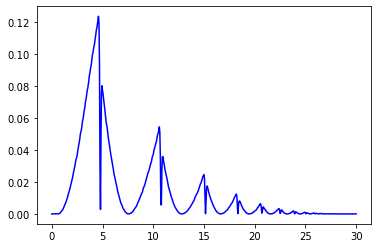

In [6]:
plt.plot(data["Latest: Time (s)"], data["Kinetic Energy (N): 1/2mv^2"], color="blue")
plt.show()

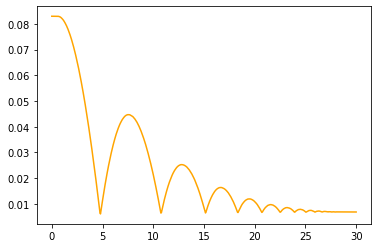

In [18]:
# testing sin
plt.plot(data["Latest: Time (s)"], data["Potential Energy (N)"], color="orange")
plt.show()


In [ ]:
# need both on sam graph along with a line representing the sum of both datasets
# as a function of time